# <img src="uni-logo.png" alt="Logo UNI" width=150 hight=300 align="right">


<br><br><br>
<h1><font color="#7F000E" size=4>Minería de Datos (CC442)</font></h1>



<h1><font color="#7F000E" size=6>Demo: k-NN</font></h1>

<br>
<div style="text-align: right">
<font color="#7F000E" size=3>Yuri Coicca, M.Sc.</font><br>
<font color="#7F000E" size=3>Facultad de Ciencias</font><br>
<font color="#7F000E" size=3>Ciencia de la Computación - UNI</font><br>
</div>

Precisión del modelo (Accuracy): 0.82

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.73      0.62      0.67        13
   virginica       0.67      0.77      0.71        13

    accuracy                           0.82        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.82      0.82      0.82        45


--- Matriz de Confusión ---


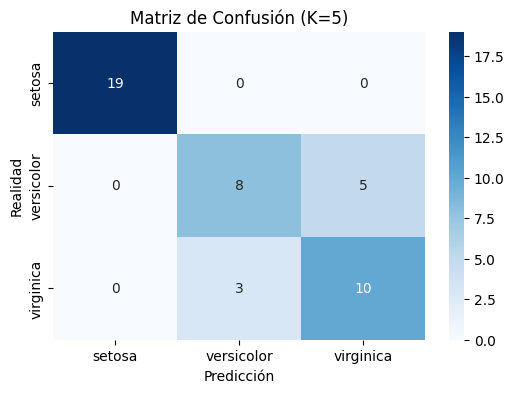

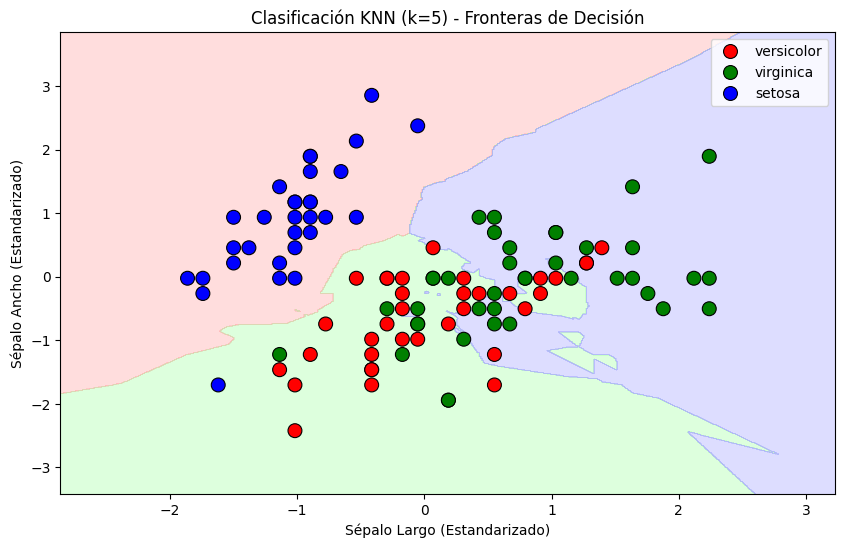

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Importamos módulos de scikit-learn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ==========================================
# 1. PREPARACIÓN DE DATOS
# ==========================================
# Cargamos el dataset Iris
iris = datasets.load_iris()

# Para poder visualizarlo en 2D, tomamos solo las 2 primeras características:
# (Sepal Length, Sepal Width).
# NOTA: En un caso real usarías todas las características.
X = iris.data[:, :2]  
y = iris.target

# Dividimos en conjunto de Entrenamiento (70%) y Prueba (30%)
# random_state=42 asegura que el resultado sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ==========================================
# 2. ESCALADO DE DATOS (CRUCIAL PARA KNN)
# ==========================================
# Como KNN usa distancias, si una variable tiene números grandes (ej. 1000) 
# y otra pequeños (ej. 0.1), dominará el cálculo. Estandarizamos para evitarlo.
scaler = StandardScaler()

# Ajustamos el escalador solo con los datos de entrenamiento para evitar "data leakage"
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==========================================
# 3. ENTRENAMIENTO DEL MODELO
# ==========================================
k = 5  # Probamos con 5 vecinos
# metric='minkowski', p=2 equivale a Distancia Euclidiana estándar
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)

knn.fit(X_train, y_train)

# ==========================================
# 4. PREDICCIÓN Y EVALUACIÓN
# ==========================================
y_pred = knn.predict(X_test)

print(f"Precisión del modelo (Accuracy): {accuracy_score(y_test, y_pred):.2f}")
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\n--- Matriz de Confusión ---")
# Visualizamos la matriz con Seaborn para que se vea bonita
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title(f'Matriz de Confusión (K={k})')
plt.show()

# ==========================================
# 5. VISUALIZACIÓN DE FRONTERAS (MAGIA VISUAL)
# ==========================================
# Creamos una malla (grid) para colorear el fondo según la predicción del modelo
X_set, y_set = X_train, y_train

# Definimos los límites del gráfico
x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1

# Generamos la malla con pasos de 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predecimos la clase para CADA punto de la malla (fondo)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficamos
plt.figure(figsize=(10, 6))
# Colores para las zonas: Rojo, Verde, Azul (claros)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# Colores para los puntos: Rojo, Verde, Azul (fuertes)
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

# Graficamos los puntos de entrenamiento encima
sns.scatterplot(x=X_set[:, 0], y=X_set[:, 1], hue=iris.target_names[y_set], 
                palette=['red', 'green', 'blue'], edgecolor="black", s=100)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Clasificación KNN (k={k}) - Fronteras de Decisión")
plt.xlabel('Sépalo Largo (Estandarizado)')
plt.ylabel('Sépalo Ancho (Estandarizado)')
plt.legend()
plt.show()